#1.Data Collection

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data_path="Housing.csv"
data=pd.read_csv(data_path)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.shape

(545, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#2.Data Preprocessing

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

###catogorical data to numeric data


In [ ]:
data=pd.get_dummies(data,drop_first=True)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [ ]:
corr_data=data.corr()

NameError: ignored

In [ ]:
X=data.drop('price',axis=1)#independent
y=data['price']#dependent

#3.Spliting The Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

#4.Training the model

In [ ]:
from sklearn.metrics import r2_score

###1.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred1=lr.predict(X_test)

In [ ]:
r2_lr = r2_score(y_test, y_pred1)

In [ ]:
print("r2 for linear regression",r2_lr)

r2 for linear regression 0.6463350878895877


###2.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2=dt.predict(X_test)

In [ ]:
r2_dt = r2_score(y_test, y_pred2)

In [ ]:
print("r2 for decision tree",r2_dt)

r2 for decision tree 0.2859930686355415


###3.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(X_test)

In [ ]:
r2_rf = r2_score(y_test, y_pred3)

In [ ]:
print("r2 for random forest",r2_dt)

r2 for random forest 0.2859930686355415


###4.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred4=knn.predict(X_test)

In [ ]:
r2_knn = r2_score(y_test, y_pred4)

In [ ]:
print("r2 for KNN",r2_knn)

r2 for KNN -0.036037574810383166


#5.Evaluating

In [ ]:
final_data_r2=pd.DataFrame({'Models':["LR","DT","RF","KNN"],
                         "r2_Score":[r2_lr,r2_dt,r2_rf,r2_knn]})
final_data_r2

,Models,r2_Score
0,LR,0.646335
1,DT,0.285993
2,RF,0.474904
3,KNN,-0.036038


<Axes: xlabel='Models', ylabel='r2_Score'>

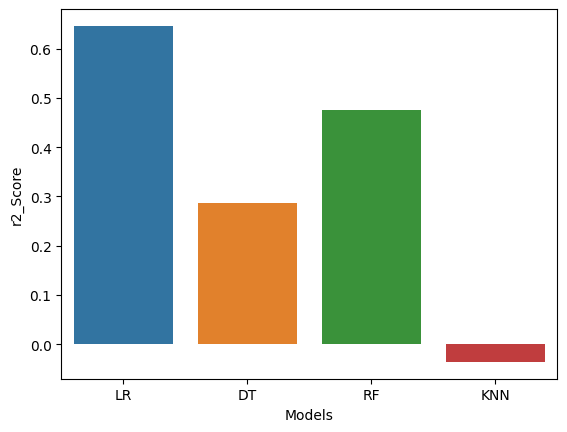

In [ ]:
sns.barplot(x=final_data_r2['Models'],y=final_data_r2['r2_Score'])

#6.Best Model

In [ ]:
best_model=lr
best_model.fit(X, y)

LinearRegression()

#7.Predction on new data

In [ ]:
data.columns

NameError: ignored

In [ ]:
new_house = pd.DataFrame({ 'area': [int(input("Enter area:"))],
                          'bedrooms': [int(input("Enter bedrooms:"))],
                           'bathrooms': [int(input("Enter bathrooms:"))],
                           'stories': [int(input("Enter stories:"))],
                           'parking': [int(input("Enter parking:"))],
                           'mainroad_yes': [int(input("Enter mainroad_yes:"))],
                           'guestroom_yes': [int(input("Enter guestroom_yes:"))],
                           'basement_yes': [int(input("Enter basement_yes:"))],
                           'hotwaterheating_yes': [int(input("Enter hotwaterheating_yes:"))],
                           'airconditioning_yes': [int(input("Enter airconditioning_yes:"))],
                           'prefarea_yes': [int(input("Enter prefarea_yes:"))],
                           'furnishingstatus_semi-furnished': [int(input("Enter furnishingstatus_semi-furnished:"))],
                           'furnishingstatus_unfurnished': [int(input("Enter furnishingstatus_unfurnished:"))],
                           })

Enter area:2345
Enter bedrooms:3
Enter bathrooms:2
Enter stories:1
Enter parking:1
Enter mainroad_yes:1
Enter guestroom_yes:1
Enter basement_yes:1
Enter hotwaterheating_yes:1
Enter airconditioning_yes:1
Enter prefarea_yes:1
Enter furnishingstatus_semi-furnished:0
Enter furnishingstatus_unfurnished:0


In [ ]:
new_house

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2345,3,2,1,1,1,1,1,1,1,1,0,0


In [ ]:
predicted_price =best_model.predict(new_house)

In [ ]:
print("Predicted Price :",int(predicted_price))

Predicted Price : 7106787
